In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Inspiration
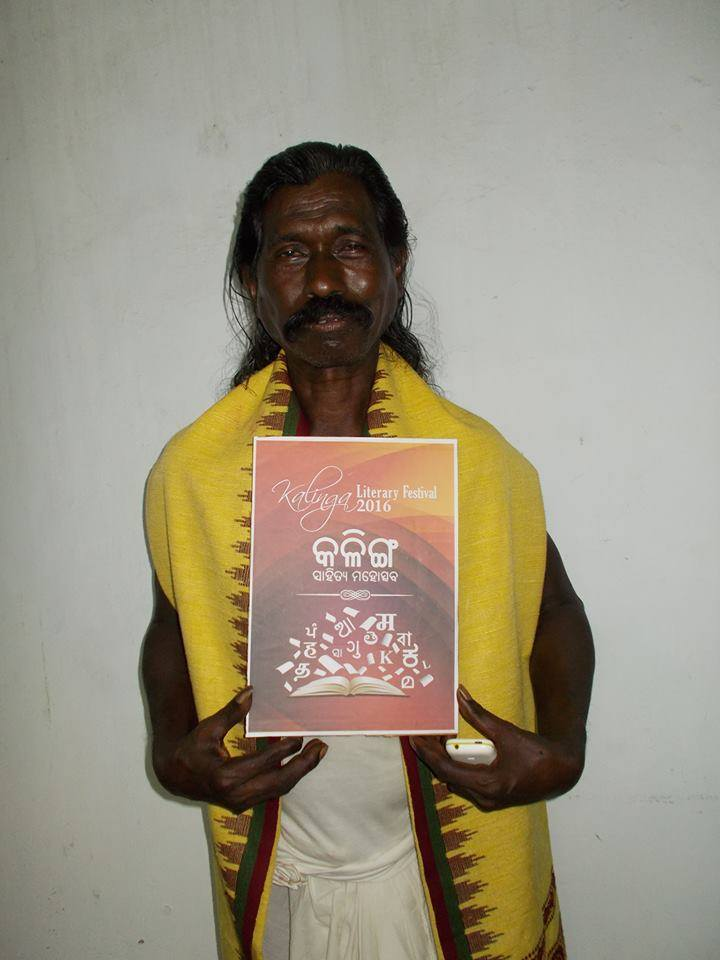

## Importing, Summarizing, and Visualizing Data

### Chapter Overview

This chapter describes where to find useful data sets, how to load them into Python, and how to (re)structure the data. We also discuss various ways in which the data can be summarized via tables and figures. Which type of plots and numerical summaries are appropriate depends on the type of the variable(s) in play.

## 1. Introduction

Data comes in many shapes and forms, but can generally be thought of as being the result of some **random experiment** — an experiment whose outcome cannot be determined in advance, but whose workings are still subject to analysis.

### Data Structure Convention

Data from a random experiment are often stored in a table or spreadsheet. A statistical convention is to denote **variables** — often called **features** — as columns and the individual items (or **units**) as rows.

It is useful to think of three types of columns in such a spreadsheet:

1. **Identifier Column**: The first column is usually an identifier or index column, where each unit/row is given a unique name or ID.

2. **Design Variables**: Certain columns (features) can correspond to the design of the experiment, specifying, for example, to which experimental group the unit belongs. Often the entries in these columns are deterministic; that is, they stay the same if the experiment were to be repeated.

3. **Measurement Variables**: Other columns represent the observed measurements of the experiment. Usually, these measurements exhibit variability; that is, they would change if the experiment were to be repeated.

## Data Sources and Repositories

### UCI Machine Learning Repository

A well-known repository of data sets is the **Machine Learning Repository** maintained by the University of California at Irvine (UCI), found at:
```
https://archive.ics.uci.edu/
```

These data sets are typically stored in a **CSV (comma separated values)** format, which can be easily read into Python.

#### Example: Abalone Dataset

```python
import pandas as pd

# Read abalone dataset
abalone = pd.read_csv('abalone.data', header=None)
```

**Important Note**: It is important to add `header=None`, as this lets Python know that the first line of the CSV does not contain the names of the features, as it assumes so by default.

The abalone data set was originally used to predict the age of abalone from physical measurements, such as shell weight and diameter.

### R Datasets Repository

Another useful repository of over 1000 data sets from various packages in the R programming language, collected by Vincent Arel-Bundock, can be found at:
```
https://vincentarelbundock.github.io/Rdatasets/datasets.html
```

#### Example: Fisher's Iris Dataset

```python
# Read Fisher's famous iris dataset
urlprefix = 'https://vincentarelbundock.github.io/Rdatasets/csv/'
dataname = 'datasets/iris.csv'
iris = pd.read_csv(urlprefix + dataname)
```

The **iris data set** contains four physical measurements (sepal/petal length/width) on 50 specimens (each) of 3 species of iris: *setosa*, *versicolor*, and *virginica*.

## Working with DataFrames

The output of `read_csv` is a **DataFrame object**, which is pandas's implementation of a spreadsheet.

### Examining Data Structure

The DataFrame method `head()` gives the first few rows of the DataFrame, including the feature names:

```python
iris.head()
```

Output:
```
   Unnamed: 0  Sepal.Length  ...  Petal.Width Species
0           1           5.1  ...          0.2  setosa
1           2           4.9  ...          0.2  setosa
2           3           4.7  ...          0.2  setosa
3           4           4.6  ...          0.2  setosa
4           5           5.0  ...          0.2  setosa

[5 rows x 6 columns]
```

### Managing Column Names

The names of the features can be obtained via the `columns` attribute:

```python
iris.columns
```

Note that the first column is a duplicate index column, whose name (assigned by pandas) is `'Unnamed: 0'`.

### Data Cleaning

We can drop unnecessary columns and reassign the DataFrame:

```python
iris = iris.drop('Unnamed: 0', 1)
```

## Mathematical Foundations

### Random Variables and Experiments

Let $X$ be a random variable representing a measurement from our experiment. The sample space $\Omega$ contains all possible outcomes, and we observe a sample $\{x_1, x_2, \ldots, x_n\}$ where each $x_i \in \Omega$.

### Feature Space Representation

For a dataset with $p$ features and $$n$$ observations, we can represent our data as a matrix:

$$\mathbf{X} = \begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{np}
\end{pmatrix}$$

where:
- Each row $i$ represents an observation (unit)
- Each column $j$ represents a feature (variable)
- $x_{ij}$ is the value of feature $j$ for observation $i$

### Types of Variables

#### Quantitative Variables
Variables that take numerical values and can be:
- **Discrete**: $X \in \{0, 1, 2, \ldots\}$ (e.g., count data)
- **Continuous**: $X \in \mathbb{R}$ (e.g., measurements)

#### Qualitative Variables
Variables that represent categories:
- **Nominal**: No natural ordering (e.g., species names)
- **Ordinal**: Natural ordering exists (e.g., small, medium, large)

## Data Summary Statistics

### Central Tendency

For a quantitative variable $X = \{x_1, x_2, \ldots, x_n\}$:

**Sample Mean:**
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$$

**Sample Median:**
$$\tilde{x} = \begin{cases}
x_{(n+1)/2} & \text{if } n \text{ is odd} \\
\frac{x_{n/2} + x_{n/2+1}}{2} & \text{if } n \text{ is even}
\end{cases}$$

### Variability Measures

**Sample Variance:**
$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

**Sample Standard Deviation:**
$$s = \sqrt{s^2}$$

**Interquartile Range:**
$$\text{IQR} = Q_3 - Q_1$$

### Correlation

For two variables $$X$$ and $$Y$$, the sample correlation coefficient is:

$$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

## Practical Implementation

### Basic Data Exploration

```python
# Basic information about the dataset
print(f"Dataset shape: {iris.shape}")
print(f"Column names: {list(iris.columns)}")
print(f"Data types:\n{iris.dtypes}")

# Summary statistics
print(iris.describe())

# Check for missing values
print(iris.isnull().sum())
```

### Grouping and Aggregation

```python
# Group by species and calculate means
species_means = iris.groupby('Species').mean()
print(species_means)

# Calculate correlation matrix
correlation_matrix = iris.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)
```

## Visualization Considerations

The choice of visualization depends on the variable types:

### Univariate Analysis
- **Quantitative**: Histograms, box plots, density plots
- **Qualitative**: Bar charts, pie charts

### Bivariate Analysis
- **Quantitative vs Quantitative**: Scatter plots, correlation plots
- **Quantitative vs Qualitative**: Box plots by group, violin plots
- **Qualitative vs Qualitative**: Contingency tables, stacked bar charts

### Multivariate Analysis
- **Pair plots**: Matrix of scatter plots
- **Heatmaps**: For correlation matrices
- **Principal Component Analysis (PCA)**: Dimensionality reduction

## Best Practices

1. **Always examine your data first** using `head()`, `info()`, and `describe()`
2. **Check for missing values** and decide on appropriate handling strategies
3. **Understand variable types** to choose appropriate summary statistics and visualizations
4. **Consider the experimental design** when interpreting results
5. **Document your data sources** and preprocessing steps

## Mathematical Notation Summary

- $n$: Sample size
- $p$: Number of features/variables
- $x_i$: $i$-th observation
- $\bar{x}$: Sample mean
- $s^2$: Sample variance
- $s$: Sample standard deviation
- $\mathbf{X}$: Data matrix
- $\Omega$: Sample space
- $Q_1, Q_3$: First and third quartiles

This framework provides the foundation for more advanced statistical analysis and machine learning applications.

# Importing, Summarizing, and Visualizing Data

## Chapter Overview

This chapter describes where to find useful data sets, how to load them into Python, and how to (re)structure the data. We also discuss various ways in which the data can be summarized via tables and figures. Which type of plots and numerical summaries are appropriate depends on the type of the variable(s) in play.

## 1.1 Introduction

Data comes in many shapes and forms, but can generally be thought of as being the result of some **random experiment** — an experiment whose outcome cannot be determined in advance, but whose workings are still subject to analysis.

### Data Structure Convention

Data from a random experiment are often stored in a table or spreadsheet. A statistical convention is to denote **variables** — often called **features** — as columns and the individual items (or **units**) as rows.

It is useful to think of three types of columns in such a spreadsheet:

1. **Identifier Column**: The first column is usually an identifier or index column, where each unit/row is given a unique name or ID.

2. **Design Variables**: Certain columns (features) can correspond to the design of the experiment, specifying, for example, to which experimental group the unit belongs. Often the entries in these columns are deterministic; that is, they stay the same if the experiment were to be repeated.

3. **Measurement Variables**: Other columns represent the observed measurements of the experiment. Usually, these measurements exhibit variability; that is, they would change if the experiment were to be repeated.

## Data Sources and Repositories

### UCI Machine Learning Repository

A well-known repository of data sets is the **Machine Learning Repository** maintained by the University of California at Irvine (UCI), found at:
```
https://archive.ics.uci.edu/
```

These data sets are typically stored in a **CSV (comma separated values)** format, which can be easily read into Python.

#### Example: Abalone Dataset

```python
import pandas as pd

# Read abalone dataset
abalone = pd.read_csv('abalone.data', header=None)
```

**Important Note**: It is important to add `header=None`, as this lets Python know that the first line of the CSV does not contain the names of the features, as it assumes so by default.

The abalone data set was originally used to predict the age of abalone from physical measurements, such as shell weight and diameter.

### R Datasets Repository

Another useful repository of over 1000 data sets from various packages in the R programming language, collected by Vincent Arel-Bundock, can be found at:
```
https://vincentarelbundock.github.io/Rdatasets/datasets.html
```

#### Example: Fisher's Iris Dataset

```python
# Read Fisher's famous iris dataset
urlprefix = 'https://vincentarelbundock.github.io/Rdatasets/csv/'
dataname = 'datasets/iris.csv'
iris = pd.read_csv(urlprefix + dataname)
```

The **iris data set** contains four physical measurements (sepal/petal length/width) on 50 specimens (each) of 3 species of iris: *setosa*, *versicolor*, and *virginica*.

## Working with DataFrames

The output of `read_csv` is a **DataFrame object**, which is pandas's implementation of a spreadsheet.

### Examining Data Structure

The DataFrame method `head()` gives the first few rows of the DataFrame, including the feature names:

```python
iris.head()
```

Output:
```
   Unnamed: 0  Sepal.Length  ...  Petal.Width Species
0           1           5.1  ...          0.2  setosa
1           2           4.9  ...          0.2  setosa
2           3           4.7  ...          0.2  setosa
3           4           4.6  ...          0.2  setosa
4           5           5.0  ...          0.2  setosa

[5 rows x 6 columns]
```

### Managing Column Names

The names of the features can be obtained via the `columns` attribute:

```python
iris.columns
```

Note that the first column is a duplicate index column, whose name (assigned by pandas) is `'Unnamed: 0'`.

### Data Cleaning

We can drop unnecessary columns and reassign the DataFrame:

```python
iris = iris.drop('Unnamed: 0', 1)
```

## Mathematical Foundations

### Random Variables and Experiments

Let $$X$$ be a random variable representing a measurement from our experiment. The sample space $$\Omega$$ contains all possible outcomes, and we observe a sample $$\{x_1, x_2, \ldots, x_n\}$$ where each $$x_i \in \Omega$$.

### Feature Space Representation

For a dataset with $$p$$ features and $$n$$ observations, we can represent our data as a matrix:

$$\mathbf{X} = \begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{np}
\end{pmatrix}$$

where:
- Each row $$i$$ represents an observation (unit)
- Each column $$j$$ represents a feature (variable)
- $$x_{ij}$$ is the value of feature $$j$$ for observation $$i$$

### Types of Variables

#### Quantitative Variables
Variables that take numerical values and can be:
- **Discrete**: $$X \in \{0, 1, 2, \ldots\}$$ (e.g., count data)
- **Continuous**: $$X \in \mathbb{R}$$ (e.g., measurements)

#### Qualitative Variables
Variables that represent categories:
- **Nominal**: No natural ordering (e.g., species names)
- **Ordinal**: Natural ordering exists (e.g., small, medium, large)

## Data Summary Statistics

### Central Tendency

For a quantitative variable $$X = \{x_1, x_2, \ldots, x_n\}$$:

**Sample Mean:**
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$$

**Sample Median:**
$$\tilde{x} = \begin{cases}
x_{(n+1)/2} & \text{if } n \text{ is odd} \\
\frac{x_{n/2} + x_{n/2+1}}{2} & \text{if } n \text{ is even}
\end{cases}$$

### Variability Measures

**Sample Variance:**
$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

**Sample Standard Deviation:**
$$s = \sqrt{s^2}$$

**Interquartile Range:**
$$\text{IQR} = Q_3 - Q_1$$

### Correlation

For two variables $$X$$ and $$Y$$, the sample correlation coefficient is:

$$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

## Practical Implementation

### Basic Data Exploration

```python
# Basic information about the dataset
print(f"Dataset shape: {iris.shape}")
print(f"Column names: {list(iris.columns)}")
print(f"Data types:\n{iris.dtypes}")

# Summary statistics
print(iris.describe())

# Check for missing values
print(iris.isnull().sum())
```

### Grouping and Aggregation

```python
# Group by species and calculate means
species_means = iris.groupby('Species').mean()
print(species_means)

# Calculate correlation matrix
correlation_matrix = iris.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)
```

## Visualization Considerations

The choice of visualization depends on the variable types:

### Univariate Analysis
- **Quantitative**: Histograms, box plots, density plots
- **Qualitative**: Bar charts, pie charts

### Bivariate Analysis
- **Quantitative vs Quantitative**: Scatter plots, correlation plots
- **Quantitative vs Qualitative**: Box plots by group, violin plots
- **Qualitative vs Qualitative**: Contingency tables, stacked bar charts

### Multivariate Analysis
- **Pair plots**: Matrix of scatter plots
- **Heatmaps**: For correlation matrices
- **Principal Component Analysis (PCA)**: Dimensionality reduction

## Best Practices

1. **Always examine your data first** using `head()`, `info()`, and `describe()`
2. **Check for missing values** and decide on appropriate handling strategies
3. **Understand variable types** to choose appropriate summary statistics and visualizations
4. **Consider the experimental design** when interpreting results
5. **Document your data sources** and preprocessing steps

## Mathematical Notation Summary

Already mentioned

## Data Access and Feature Naming

### Accessing Individual Features

The data for each feature (corresponding to its specific name) can be accessed by using Python's slicing notation `[]`. For example, the object `iris['Sepal.Length']` contains the 150 sepal lengths.

```python
# Access specific feature
sepal_lengths = iris['Sepal.Length']
print(f"First 5 sepal lengths: {sepal_lengths.head()}")
```

### Example: Abalone Dataset Structure

The first three rows of the abalone data set from the UCI repository can be found as follows:

```python
abalone.head(3)
```

Output:
```
   0      1      2      3       4       5       6       7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
```

Here, the missing headers have been assigned according to the order of the natural numbers. The names should correspond to: Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, and Rings, as described in the file `abalone.names` on the UCI website.

### Manual Column Assignment

We can manually add the names of the features to the DataFrame by reassigning the `columns` attribute:

```python
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 
                   'Whole weight', 'Shucked weight', 'Viscera weight', 
                   'Shell weight', 'Rings']
```

## 1.2 Structuring Features According to Type

### Classification of Feature Types

We can generally classify features as either **quantitative** or **qualitative**.

#### Quantitative Features

**Quantitative features** possess "numerical quantity", such as height, age, number of births, etc., and can either be **continuous** or **discrete**.

- **Continuous quantitative features** take values in a continuous range of possible values, such as height, voltage, or crop yield; such features capture the idea that measurements can always be made more precisely.

- **Discrete quantitative features** have a countable number of possibilities, such as a count.

Mathematically, we can represent:
- **Continuous**: $X \in \mathbb{R}$ or $X \in [a,b] \subset \mathbb{R}$
- **Discrete**: $X \in \{0, 1, 2, 3, \ldots\}$ or $X \in \mathbb{Z}$

#### Qualitative Features

In contrast, **qualitative features** do not have a numerical meaning, but their possible values can be divided into a fixed number of categories, such as $\{M, F\}$ for gender or $\{\text{blue, black, brown, green}\}$ for eye color. For this reason such features are also called **categorical**.

**Simple Rule of Thumb**: If it does not make sense to average the data, it is categorical.

For example, it does not make sense to average eye colors. Of course it is still possible to represent categorical data with numbers, such as $1 = \text{blue}$, $2 = \text{black}$, $3 = \text{brown}$, but such numbers carry no quantitative meaning.

Categorical features are often called **factors**.

### Mathematical Representation of Categorical Variables

For a categorical variable with $k$ categories, we can use:

**Indicator/Dummy Variables:**
$X_j = \begin{cases}
1 & \text{if observation belongs to category } j \\
0 & \text{otherwise}
\end{cases}$

where $j = 1, 2, \ldots, k$ and $\sum_{j=1}^{k} X_j = 1$.

## Case Study: Nutrition Elderly Dataset

### Data Loading and Initial Exploration

When manipulating, summarizing, and displaying data, it is important to correctly specify the type of the variables (features). We illustrate this using the `nutrition_elderly` data set, which contains the results of a study involving nutritional measurements of thirteen features (columns) for 226 elderly individuals (rows).

```python
# Load Excel file directly
xls = 'http://www.biostatisticien.eu/springeR/nutrition_elderly.xls'
nutri = pd.read_excel(xls)

# Display settings for better visualization
pd.set_option('display.max_columns', 8)  # to fit display
nutri.head(3)
```

Output:
```
   gender  situation  tea  ...  cooked_fruit_veg  chocol  fat
0       2          1    0  ...                 4       5    6
1       2          1    1  ...                 5       1    4
2       2          1    0  ...                 2       5    4

[3 rows x 13 columns]
```

### Data Type Analysis

You can check the type (or structure) of the variables via the `info()` method:

```python
nutri.info()
```

Output:
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
gender               226 non-null int64
situation            226 non-null int64
tea                  226 non-null int64
coffee               226 non-null int64
height               226 non-null int64
weight               226 non-null int64
age                  226 non-null int64
meat                 226 non-null int64
fish                 226 non-null int64
raw_fruit            226 non-null int64
cooked_fruit_veg     226 non-null int64
chocol               226 non-null int64
fat                  226 non-null int64
dtypes: int64(13)
memory usage: 23.0 KB
```

All 13 features in `nutri` are (at the moment) interpreted by Python as quantitative variables, indeed as integers, simply because they have been entered as whole numbers.

### Proper Feature Classification

The meaning of these numbers becomes clear when we consider the description of the features. The variable types should be classified as follows:

| **Feature Type** | **Variables** |
|------------------|---------------|
| **Qualitative** | `gender`, `situation`, `fat` |
| **Ordinal Qualitative** | `meat`, `fish`, `raw_fruit`, `cooked_fruit_veg`, `chocol` |
| **Discrete Quantitative** | `tea`, `coffee` |
| **Continuous Quantitative** | `height`, `weight`, `age` |

### Ordinal Variables

Note that the categories of the qualitative features `meat`, `fish`, `raw_fruit`, `cooked_fruit_veg`, `chocol` have a natural order. Such qualitative features are sometimes called **ordinal**.

For ordinal variables, we can define an ordering relation. If $C = \{c_1, c_2, \ldots, c_k\}$ represents the categories, then:

$c_1 \prec c_2 \prec \cdots \prec c_k$

where $\prec$ denotes the ordering relation (e.g., "less than" in terms of frequency or intensity).

### Data Type Conversion in Python

```python
# Convert appropriate columns to categorical
categorical_cols = ['gender', 'situation', 'fat', 'meat', 'fish', 
                   'raw_fruit', 'cooked_fruit_veg', 'chocol']

for col in categorical_cols:
    nutri[col] = nutri[col].astype('category')

# For ordinal variables, specify the order
ordinal_cols = ['meat', 'fish', 'raw_fruit', 'cooked_fruit_veg', 'chocol']
for col in ordinal_cols:
    nutri[col] = pd.Categorical(nutri[col], ordered=True)

# Verify the changes
print(nutri.dtypes)
```

### Statistical Implications

The correct classification of variables is crucial because:

1. **Summary Statistics**: 
   - Quantitative: Mean ($\bar{x}$), median, standard deviation ($s$)
   - Categorical: Mode, frequency tables, proportions

2. **Visualization Choices**:
   - Quantitative: Histograms, scatter plots, box plots
   - Categorical: Bar charts, pie charts, contingency tables

3. **Statistical Tests**:
   - Different tests apply to different variable types
   - Parametric vs. non-parametric approaches

### Mathematical Framework for Mixed Data Types

For a dataset with both quantitative and qualitative variables, we can partition our feature matrix:

$\mathbf{X} = [\mathbf{X}_{\text{quant}} | \mathbf{X}_{\text{qual}}]$

where:
- $\mathbf{X}_{\text{quant}} \in \mathbb{R}^{n \times p_q}$ contains quantitative features
- $\mathbf{X}_{\text{qual}} \in \mathcal{C}^{n \times p_c}$ contains categorical features
- $\mathcal{C}$ represents the space of categorical values
- $p_q + p_c = p$ (total number of features)

This framework enables appropriate statistical analysis and modeling techniques for each data type.